<a href="https://colab.research.google.com/github/NILESH-SH/AIML/blob/main/AIMLP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB
number of duplicate rows = 1
X_train (66, 1)
X_test (17, 1)
train_labels (66,)
test_labels (17,)
slope: [0.00181213]
y-intercept:  -0.005650877232589835
Mean squared error: 0.05939448244007495
R square: 0.09596963084700993


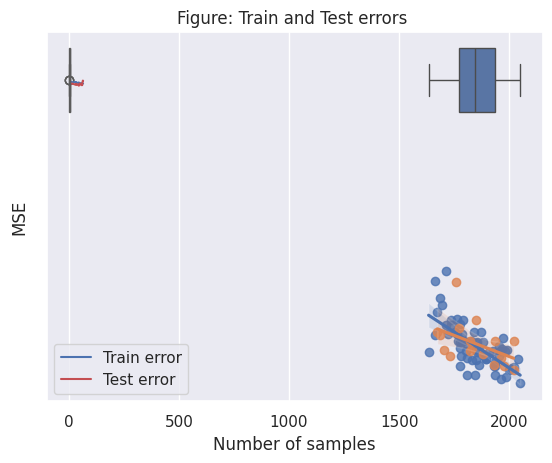

In [2]:
# Code by Nitin Malik, India, https://www.linkedin.com/in/drnitinmalik/

# Simple Linear Regression (SLR): predicting GPA from SAT score

# STEP1: IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.metrics import mean_squared_error, r2_score

# STEP2: IMPORTING THE DATASET
dataset = pd.read_csv('SAT-GPA.csv')
dataset.head()

# STEP3: EXPLORATORY DATA ANALYSIS
dataset.shape
dataset.describe()
dataset.info()
sns.boxplot(x=dataset['SAT']) # no outliers
sns.boxplot(x=dataset['GPA']) # there are outliers

# STEP4: DATA PREPROCESSING

# duplicate data
dups=dataset.duplicated() # not all boolean values visible
print('number of duplicate rows = %d' % (dups.sum())) # alternatively sum(dups)
dataset.drop_duplicates(inplace=True) # drop duplicates

# missing values
dataset.isnull().sum() # no missing values
# in case there are,  impute them

# no categorical data. In case there is, then you have to encode categorical data

# STEP5: SEGGREGATING THE FEATURE MATRIX AND TARGET
X = dataset.iloc[:, :-1] #Take all the rowns and all the columns except last one
y = dataset.iloc[:, -1] #Take all the rows and the last column as the result

#train=dataset.iloc

# STEP6: TRAIN (X_train & Y_train)- TEST (X test & y_test)SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # ft returns 4 subsets

# ideally do cross-validation

# dimensions of train and test data
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('train_labels', y_train.shape)
print('test_labels', y_test.shape)

# description of train and test data
X_train.describe()
X_test.describe()
y_train.describe()
y_test.describe()

## STEP7: BUILDING SLR MODEL
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # object regressor is created
regressor.fit(X_train, y_train) # Fitting Linear Regression to the Training set

# Regression coefficients
print('slope:', regressor.coef_)
print("y-intercept: ", regressor.intercept_)
# reg model is GPA = m SAT + c

# STEP8: PREDICTING ON TEST DATA
y_pred = regressor.predict(X_test)

# STEP9: DATA VISUALIZATION

# Regression plot for training set results
dataframe_training = pd.DataFrame() # creating empty dataframe
dataframe_training['SAT'] = X_train['SAT'] # adding SAT to this dataframe
dataframe_training['GPA'] = y_train # adding GPA to this dataframe
ax = sns.regplot(x="SAT", y="GPA", data= dataframe_training) # shadow line around regression line is CI

# Regression plot for test set results
dataframe_test = pd.DataFrame()
dataframe_test['SAT'] = X_test['SAT']
dataframe_test['GPA'] = y_test
ax = sns.regplot(x="SAT", y="GPA", data= dataframe_test)

# STEP10: MODEL EVALUATION: MSE, R2
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred))) # comparing y_pred with y_test
print("R square: {}".format(r2_score(y_test, y_pred)))

# MSE on Train and Test data
def reg_linear_reg(X,t,lmbda):
    K=X.shape[1]
    I=np.identity(K)
    I[0][0]=0
    return (np.linalg.inv(X.transpose().dot(X)+lmbda*I)\
        .dot(X.transpose()).dot(t))

N=X_train.shape[0]
Error_train=[]
Error_test=[]
for m in np.arange(10,N):
    X_train_m=X_train[:m]
    y_train_m=y_train[:m]
    X_test_m=X_train[m:]
    y_test_m=y_train[m:]
    w_m=reg_linear_reg(X_train_m,y_train_m,10**(-6))
    preds_train=X_train_m.dot(w_m)
    preds_test=X_test_m.dot(w_m)
    Error_train.append(np.mean(np.square(preds_train-y_train)))
    Error_test.append(np.mean(np.square(preds_test-y_test_m)))

plt.title('Figure: Train and Test errors ')
Train, =plt.plot(np.arange(10,N),Error_train,color='b',label='Train error')
Test, =plt.plot(np.arange(10,N),Error_test,color='r',label='Test error')
plt.ylabel('MSE')
plt.xlabel('Number of samples')
plt.legend(handles=[Train,Test])

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful